In [ ]:
!pip install --upgrade numpy
!pip install --force-reinstall --no-cache-dir gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
^C


In [ ]:
! pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

### Task 1: Sentence decoding

### Load the data

In [ ]:
# Download and extract the data and learn_decoder.py
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip


--2025-06-24 18:53:21--  https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97708666 (93M) [application/octet-stream]
Saving to: ‘files.zip’

files.zip           100%[===================>]  93.18M  63.6MB/s    in 1.5s    

2025-06-24 18:53:23 (63.6 MB/s) - ‘files.zip’ saved [97708666/97708666]

Archive:  files.zip
replace stimuli_180concepts.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: stimuli_180concepts.txt  
replace learn_decoder.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: learn_decoder.py        
replace vectors_180concepts.GV42

In [ ]:
#Let's load the functions from learn_decoder.py
from learn_decoder import *
import numpy as np

#and the data
data = read_matrix("imaging_data.csv", sep=",")
glove_vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts


In [ ]:
concepts

array(['ability', 'accomplished', 'angry', 'apartment', 'applause',
       'argument', 'argumentatively', 'art', 'attitude', 'bag', 'ball',
       'bar', 'bear', 'beat', 'bed', 'beer', 'big', 'bird', 'blood',
       'body', 'brain', 'broken', 'building', 'burn', 'business',
       'camera', 'carefully', 'challenge', 'charity', 'charming',
       'clothes', 'cockroach', 'code', 'collection', 'computer',
       'construction', 'cook', 'counting', 'crazy', 'damage', 'dance',
       'dangerous', 'deceive', 'dedication', 'deliberately', 'delivery',
       'dessert', 'device', 'dig', 'dinner', 'disease', 'dissolve',
       'disturb', 'do', 'doctor', 'dog', 'dressing', 'driver', 'economy',
       'election', 'electron', 'elegance', 'emotion', 'emotionally',
       'engine', 'event', 'experiment', 'extremely', 'feeling', 'fight',
       'fish', 'flow', 'food', 'garbage', 'gold', 'great', 'gun', 'hair',
       'help', 'hurting', 'ignorance', 'illness', 'impress', 'invention',
       'investigat

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm


# Constants
k = 18
fold_size = 10
# n_concepts = data.shape[0]


# Function to compute rank
def compute_rank(decoded_vec, true_vec, all_vectors):
    sims = cosine_similarity(decoded_vec.reshape(1, -1), all_vectors).flatten()
    rank = (-sims).argsort().tolist().index(true_vec) + 1
    return rank

# data is brain embeddings
# vectors is embedding of concepts
# concepts are the stimuli words
def train(data, vectors, concepts, k, fold_size):
  # Store results
  n_concepts = data.shape[0]
  all_ranks = []       # list of per-concept ranks
  average_ranks = []   # list of average rank per fold

  # Loop over 18 folds
  for i in tqdm(range(k)):
      test_idx = np.arange(i * fold_size, (i + 1) * fold_size)
      train_idx = np.setdiff1d(np.arange(n_concepts), test_idx)

      # Split data
      train_data = data[train_idx]
      train_vectors = vectors[train_idx]
      test_data = data[test_idx]
      test_vectors = vectors[test_idx]
      test_concepts = concepts[test_idx]

      # Learn decoder
      decoder = learn_decoder(train_data, train_vectors)  # shape: (V, 300)

      # Decode
      predicted = test_data @ decoder  # shape: (10, 300)

      # Evaluate
      fold_ranks = []
      for j in range(fold_size):
          true_vector_index = np.where((vectors == test_vectors[j]).all(axis=1))[0][0]
          rank = compute_rank(predicted[j], true_vector_index, vectors)
          fold_ranks.append((test_concepts[j], rank))

      avg_rank = np.mean([r[1] for r in fold_ranks])
      all_ranks.extend(fold_ranks)
      average_ranks.append(avg_rank)


  print(f"\nAverage rank across folds: {np.mean(average_ranks):.2f}")
  return all_ranks, average_ranks, decoder


def evaluate(average_ranks, all_ranks, embedding_type, k, num_classes):
  # Plot average rank per fold
  plt.figure(figsize=(10, 5))
  plt.plot(range(1, k + 1), average_ranks, marker='o', linestyle='-', color='blue')
  plt.title(f"Average Rank Accuracy per Fold ({k}-fold CV) - {embedding_type}")
  plt.xlabel("Fold Number")
  plt.ylabel("Average Rank (Lower is Better)")
  plt.xticks(range(1, k + 1))
  plt.ylim(0, max(average_ranks) + 10)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  # Step 1: Group all rank scores by concept
  concept_ranks = defaultdict(list)
  for concept, rank in all_ranks:
      concept_ranks[concept].append(rank)

  # Step 2: Compute average rank per concept
  concept_avg_ranks = {c: np.mean(r) for c, r in concept_ranks.items()}

  # Step 3: Sort
  best_decoded = sorted(concept_avg_ranks.items(), key=lambda x: x[1])[:10]
  worst_decoded = sorted(concept_avg_ranks.items(), key=lambda x: x[1], reverse=True)[:10]

  # Step 4: Plot
  fig, axes = plt.subplots(2, 1, figsize=(14, 14), sharex=False)

  # Best decoded
  axes[0].barh([x[0] for x in reversed(best_decoded)], [x[1] for x in reversed(best_decoded)], color='#81C784')
  axes[0].set_title(f"Top 10 Best-Decoded - {embedding_type}",fontsize=18)
  axes[0].set_xlabel("Average Rank (Lower = Better)",fontsize=18)
  axes[0].set_ylabel("Concept",fontsize=18)
  axes[0].tick_params(axis='both', labelsize=18)
  axes[0].invert_yaxis()

  # Worst decoded
  axes[1].barh([x[0] for x in reversed(worst_decoded)], [x[1] for x in reversed(worst_decoded)], color='#E57373')
  axes[1].set_title(f"Top 10 Worst-Decoded - {embedding_type}",fontsize=18)
  axes[1].set_xlabel("Average Rank (Higher = Worse)",fontsize=18)
  axes[1].tick_params(axis='both', labelsize=18)
  axes[1].invert_yaxis()

  plt.tight_layout()
  plt.show()

  low_rank_concepts = [c for c, r in concept_avg_ranks.items() if r < num_classes/2]
  print(f"Number of concepts with average rank < {int(num_classes/2)} using {embedding_type}: {len(low_rank_concepts)}")



100%|██████████| 18/18 [00:26<00:00,  1.47s/it]



Average rank across folds: 61.91


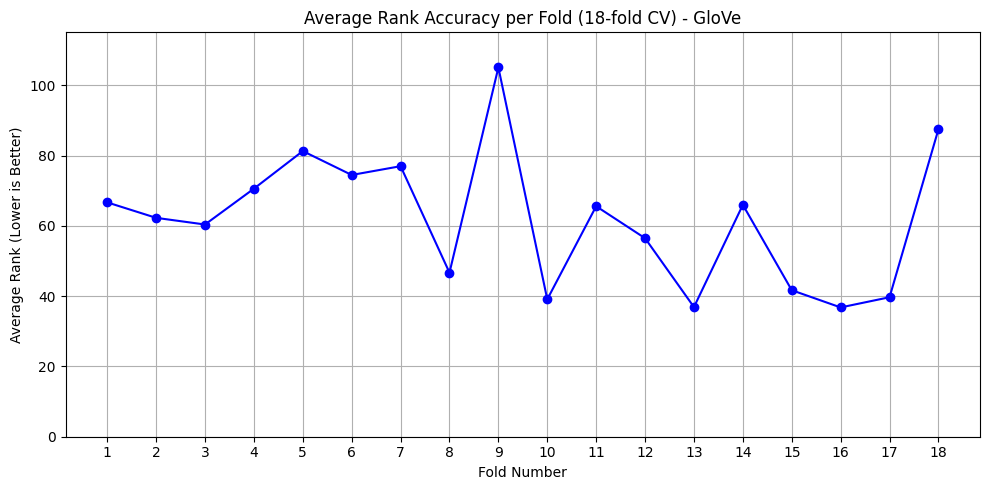

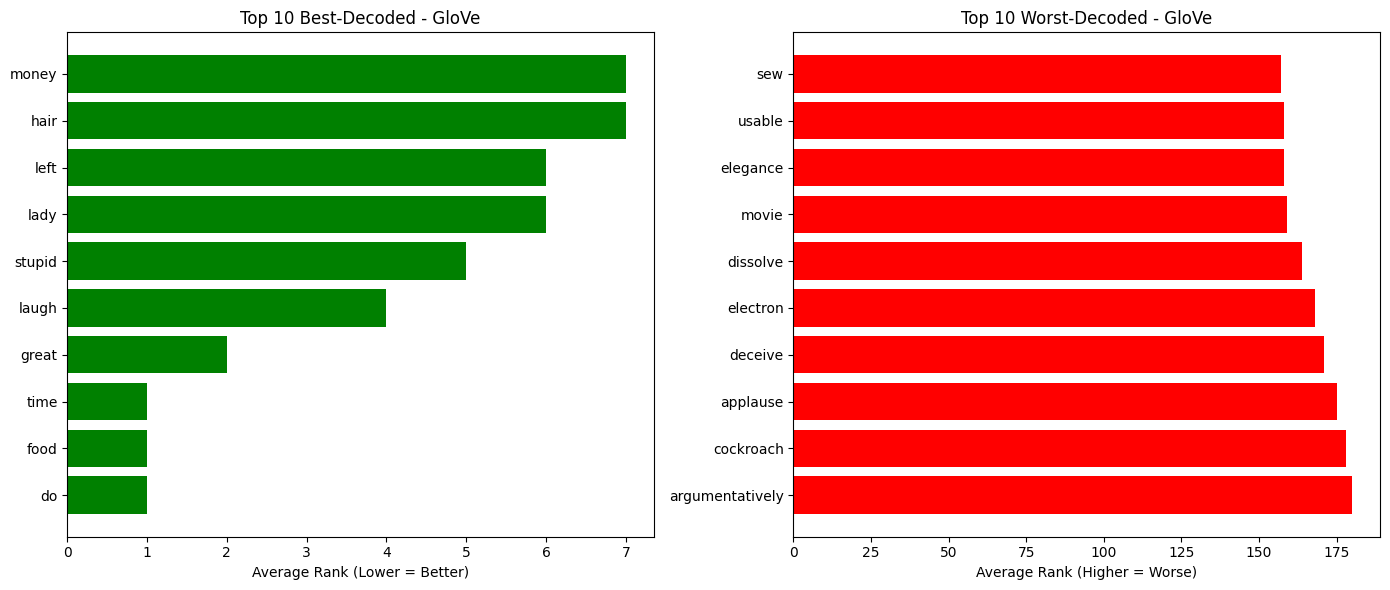

Number of concepts with average rank < 90 using GloVe: 134


In [ ]:
all_ranks_glove, average_ranks_glove,decoder_glove = train(data, glove_vectors, concepts, k, fold_size)
evaluate(average_ranks_glove, all_ranks_glove, "GloVe", k, 180)

In [ ]:
!rm -rf /root/gensim-data/word2vec-google-news-300

import gensim.downloader as api
w2v = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
w2v_vectors = np.array([w2v[c] if c in w2v else np.zeros(300) for c in concepts])

100%|██████████| 18/18 [00:46<00:00,  2.60s/it]



Average rank across folds: 61.08


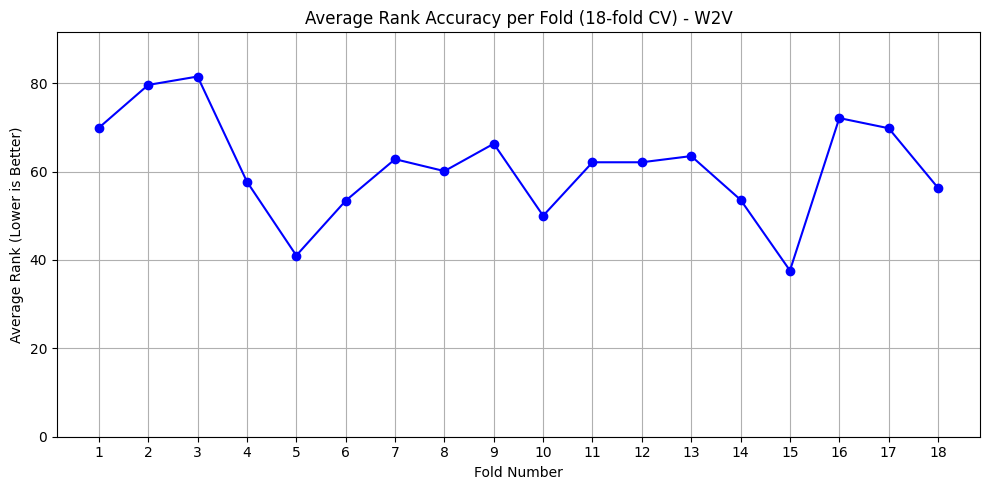

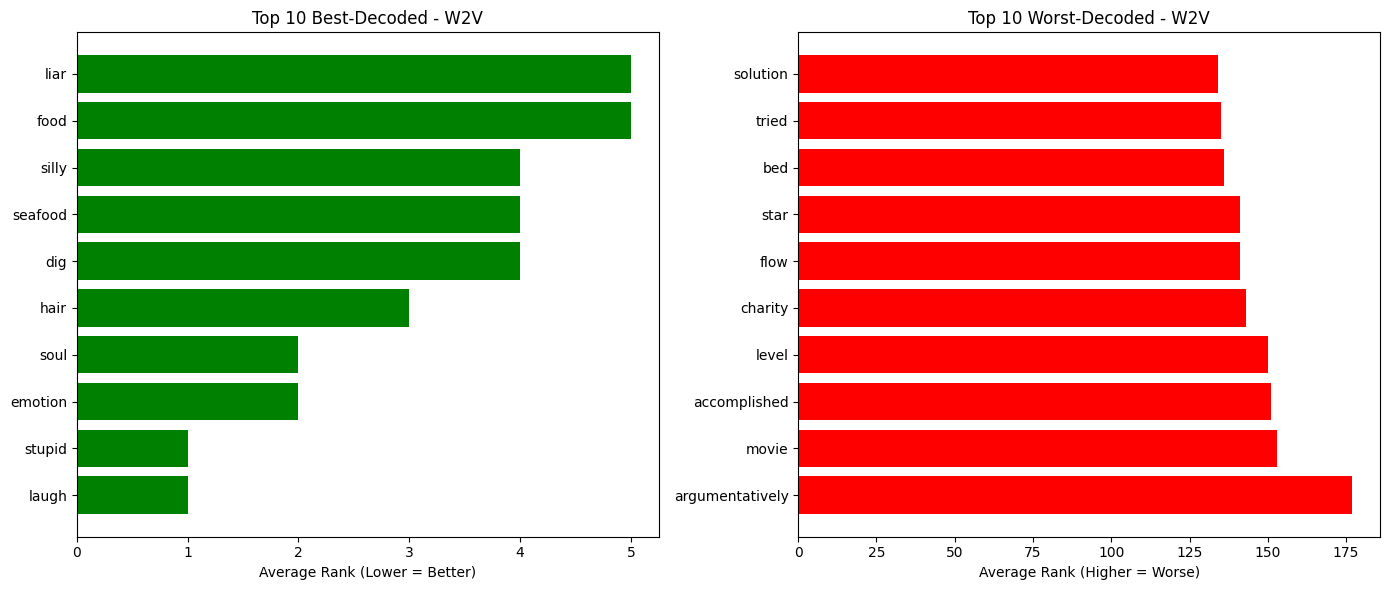

Number of concepts with average rank < 90 using W2V: 137


In [ ]:
all_ranks_w2v, average_ranks_w2v,_ = train(data, w2v_vectors, concepts, k, fold_size)
evaluate(average_ranks_w2v, all_ranks_w2v, "W2V", k, 180)

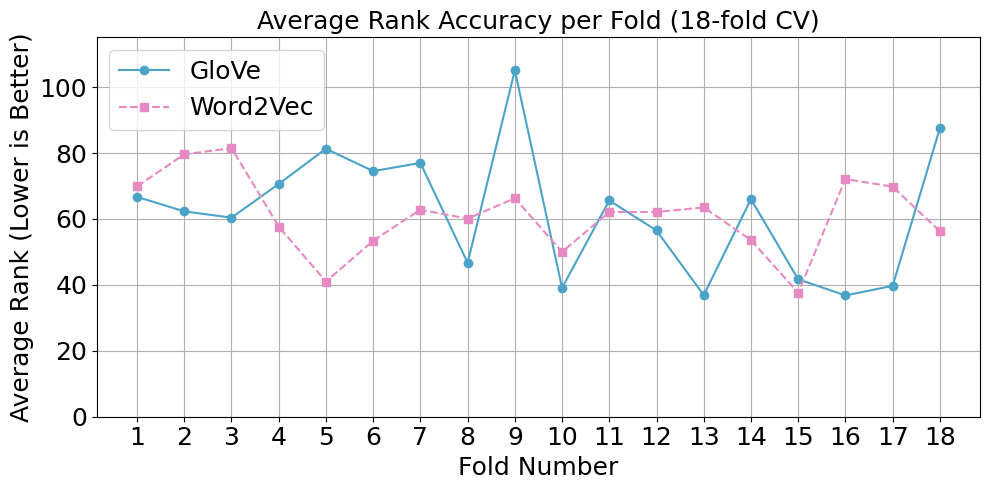

In [ ]:
import matplotlib.pyplot as plt

def plot_combined_ranks(avg_ranks_glove, avg_ranks_w2v, k):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, k + 1), avg_ranks_glove, marker='o', linestyle='-', color='#4ba3c7', label='GloVe')
    plt.plot(range(1, k + 1), avg_ranks_w2v, marker='s', linestyle='--', color='#e78ac3', label='Word2Vec')
    plt.title(f"Average Rank Accuracy per Fold ({k}-fold CV)", fontsize=18)
    plt.xlabel("Fold Number", fontsize=18)
    plt.ylabel("Average Rank (Lower is Better)", fontsize=18)
    plt.xticks(range(1, k + 1), fontsize=18)
    plt.ylim(0, max(max(avg_ranks_glove), max(avg_ranks_w2v)) + 10)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=18)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("combined_avg_rank_per_fold.png")
    plt.show()
plot_combined_ranks(average_ranks_glove, average_ranks_w2v, k)


# Our analysis

Word2Vec achieved slightly better performance than GloVe, with a lower average rank across 18 cross-validation folds (61.08 vs. 61.91) and more concepts decoded with an average rank below 90 (137 vs. 134). While the differences are subtle, Word2Vec also exhibited more stable performance across folds, whereas GloVe showed higher variance, including several outlier folds with notably poor results.

Examining the best and worst decoded concepts revealed overlaps and contrasts. Concepts like laugh, food, hair, and stupid were well decoded by both models, suggesting robust neural and semantic representations. GloVe excelled with abstract nouns like money and great, while Word2Vec performed better with emotional and action-related words like liar, emotion, and dig.  Notably, 'argumentatively' ranked among the worst-decoded concepts for both embeddings. In Word2Vec, this was due to its absence from the vocabulary where we chose to represent it by a zero vector.

## Task 1 part 2

In Pereira et al., 2018, three key analyses—referred to as Experiments 1, 2, and 3—were conducted to examine the feasibility of decoding linguistic meaning from patterns of brain activity. All three analyses shared a central methodology: they used semantic vectors derived from GloVe embeddings and trained decoders to map fMRI data to these representations. Across experiments, the decoders were trained using ridge regression on selected voxels that were most informative for predicting semantic dimensions. Evaluation was carried out using rank accuracy and pairwise classification to assess how well the decoded vectors matched their intended meanings.

The primary difference between the analyses lay in the type of stimuli and the generalization challenge involved. Experiment 1 focused on decoding individual word meanings. Subjects were shown 180 distinct concepts, each presented in three different paradigms (sentence context, picture, and word cloud) to disambiguate their meanings. The decoder was trained and tested within this dataset using cross-validation. This experiment served as a foundational validation of the approach, showing that it was possible to reconstruct concept-level semantic representations from brain activity.

Experiment 2 extended the framework by testing whether a decoder trained only on individual word stimuli could generalize to sentence-level inputs. Subjects read 384 sentences grouped into 96 passages, each covering one of 24 semantic topics (e.g., musical instruments, crimes, etc.). The decoder, trained solely on Experiment 1 word data, was used to predict sentence representations—computed as the average of the GloVe vectors for the sentence’s content words—from new fMRI data. The results showed that the decoder could successfully distinguish between sentences, even those within the same topic, suggesting meaningful generalization from words to sentence-level semantics.

Experiment 3 posed an even more stringent test of generalization. It used 243 sentences from 72 new passages, including both Wikipedia-style texts and narrative content, on entirely new topics not seen during training. The same decoder trained in Experiment 1 was applied to this data without modification. Despite the increased variability in content and structure, the decoder still achieved significant performance, indicating that the neural-semantic mapping learned from individual words was robust enough to generalize to unseen, naturalistic linguistic input.

Overall, while all three analyses were built on the same core methodology, they progressively increased the difficulty of the decoding task: from within-domain word decoding in Experiment 1, to generalization to structured sentences in Experiment 2, and finally to cross-domain generalization in Experiment 3. This progression allowed the authors to demonstrate not only that semantic decoding from fMRI is feasible, but also that it can extend beyond the specific training stimuli to capture more complex and naturalistic linguistic meaning.

## Task 1 part 3

### Load The data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# Y_exp2 = np.loadtxt("/content/drive/MyDrive/Structured Task (sentence decoding)/vectors_384sentences.GV42B300.average.txt")


Mounted at /content/drive/


In [ ]:
import pickle
import numpy as np
path = "/content/drive/MyDrive/Structured Task (sentence decoding)"

# Load EXP2 (Experiment 2)
with open(f"{path}/EXP2.pkl", "rb") as f:
    exp2 = pickle.load(f)

X_exp2 = exp2["Fmridata"]                    # shape: (384, 185866)
Y_exp2 = np.loadtxt(f"{path}/vectors_384sentences.GV42B300.average.txt")  # shape: (384, 300)
with open(f"{path}/stimuli_384sentences.txt", "r", encoding="utf-8") as f:
    sentences_2 = [line.strip() for line in f.readlines()]

# Load EXP3 (Experiment 3)
with open(f"{path}/EXP3.pkl", "rb") as f:
    exp3 = pickle.load(f)

X_exp3 = exp3["Fmridata"]                    # shape: (243, 185866)
Y_exp3 = np.loadtxt(f"{path}/vectors_243sentences.GV42B300.average.txt") # shape: (243, 300)
with open(f"{path}/stimuli_243sentences.txt", "r", encoding="utf-8") as f:
    sentences_3 = [line.strip() for line in f.readlines()]

In [ ]:
import pandas as pd
data_2 = pd.read_csv(f"{path}/neuralData_for_EXP1.csv", index_col=0).to_numpy()

In [ ]:
# Verify shape matches input size
data_2.shape

(180, 185866)

In [ ]:
_,_,decoder_glove_2 = train(data_2, glove_vectors, concepts, k, fold_size)

100%|██████████| 18/18 [00:37<00:00,  2.06s/it]


Average rank across folds: 79.76


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def rank_accuracy(decoded_vectors, gold_vectors):
    sims = cosine_similarity(decoded_vectors, gold_vectors)
    ranks = np.argsort(-sims, axis=1)  # descending order
    correct_ranks = [np.where(row == i)[0][0] for i, row in enumerate(ranks)]
    accs = 1 - (np.array(correct_ranks) / (len(gold_vectors) - 1))
    return accs.mean(), correct_ranks


In [ ]:
# Use the GloVe-based decoder learned from 180 concept-level items (HW3)
# decoder = learn_decoder(data, glove_vectors)

# Decode sentence-level fMRI → semantic space
Y_pred_exp2 = X_exp2 @ decoder_glove_2
Y_pred_exp3 = X_exp3 @ decoder_glove_2

# Evaluate rank accuracy
acc2, ranks2 = rank_accuracy(Y_pred_exp2, Y_exp2)
acc3, ranks3 = rank_accuracy(Y_pred_exp3, Y_exp3)

print(f"Rank accuracy on Experiment 2 (384 sentences): {acc2:.3f}")
print(f"Rank accuracy on Experiment 3 (243 sentences): {acc3:.3f}")


Rank accuracy on Experiment 2 (384 sentences): 0.588
Rank accuracy on Experiment 3 (243 sentences): 0.587


## Task 1 part 4

In [ ]:
def evaluate_by_topic(X, Y, decoder, labels_passage, labels_topic, topic_names, title=""):
    Y_pred = X @ decoder
    sims = cosine_similarity(Y_pred, Y)
    correct_ranks = [np.where(np.argsort(-row) == i)[0][0] for i, row in enumerate(sims)]

    topic_ranks = defaultdict(list)

    for i, rank in enumerate(correct_ranks):
        passage_id = labels_passage[i]
        topic_id = labels_topic[passage_id]
        topic_name = topic_names[topic_id]
        topic_ranks[topic_name].append(rank)

    avg_topic_ranks = {topic: np.mean(ranks) for topic, ranks in topic_ranks.items()}
    sorted_topics = sorted(avg_topic_ranks.items(), key=lambda x: x[1])

    print(f"\n{title} — Top 5 best-predicted topics:")
    for topic, rank in sorted_topics[:5]:
        print(f"{topic}: Avg Rank = {rank:.2f}")

    print(f"\n{title} — Top 5 worst-predicted topics:")
    for topic, rank in sorted_topics[-5:]:
        print(f"{topic}: Avg Rank = {rank:.2f}")

    # Plot
    plt.figure(figsize=(12, 5))
    top = sorted_topics[:5]
    bottom = sorted_topics[-5:]

    labels = [x[0] for x in top] + [x[0] for x in bottom]
    values = [x[1] for x in top] + [x[1] for x in bottom]
    colors = ['#81C784'] * 5 + ['#E57373'] * 5

    plt.barh(labels, values, color=colors)
    plt.title(f"Best and Worst Predicted Topics - {title}", fontsize=18)
    plt.xlabel("Average Rank (Lower is Better)", fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    return sorted_topics



Experiment 2 — Top 5 best-predicted topics:
body_part: Avg Rank = 71.44
human: Avg Rank = 86.69
drink_non_alcoholic: Avg Rank = 102.00
dwelling: Avg Rank = 114.19
appliance: Avg Rank = 114.88

Experiment 2 — Top 5 worst-predicted topics:
insect: Avg Rank = 183.56
animal: Avg Rank = 196.50
vehicles_transport: Avg Rank = 200.44
vegetable: Avg Rank = 235.19
profession: Avg Rank = 248.62


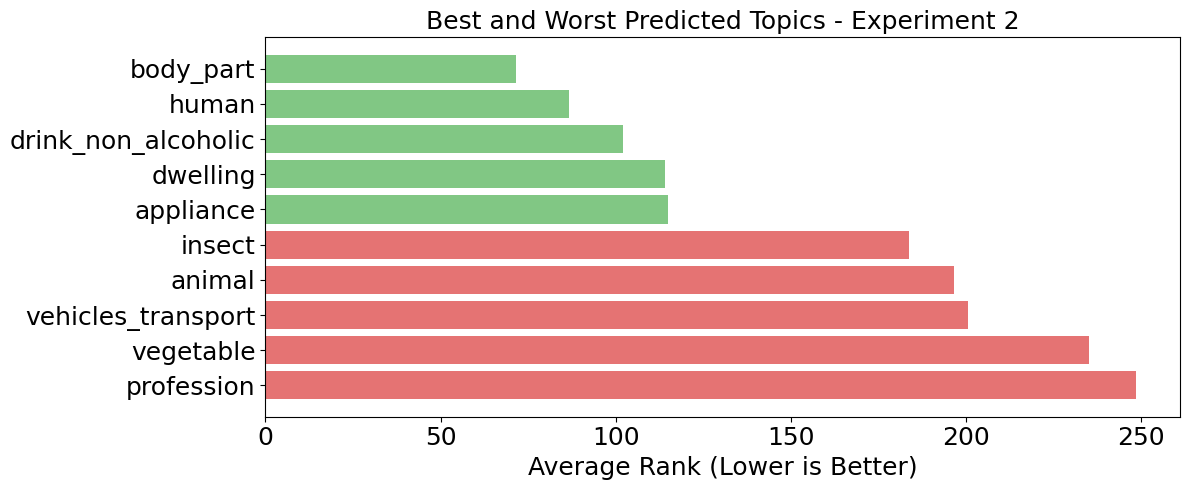


Experiment 3 — Top 5 best-predicted topics:
dreams: Avg Rank = 51.40
opera: Avg Rank = 56.45
stress: Avg Rank = 57.40
bone_fracture: Avg Rank = 63.73
law_school: Avg Rank = 66.80

Experiment 3 — Top 5 worst-predicted topics:
skiing: Avg Rank = 132.70
pyramid: Avg Rank = 141.40
owl: Avg Rank = 142.30
lawn_mower: Avg Rank = 151.20
beekeeping: Avg Rank = 167.09


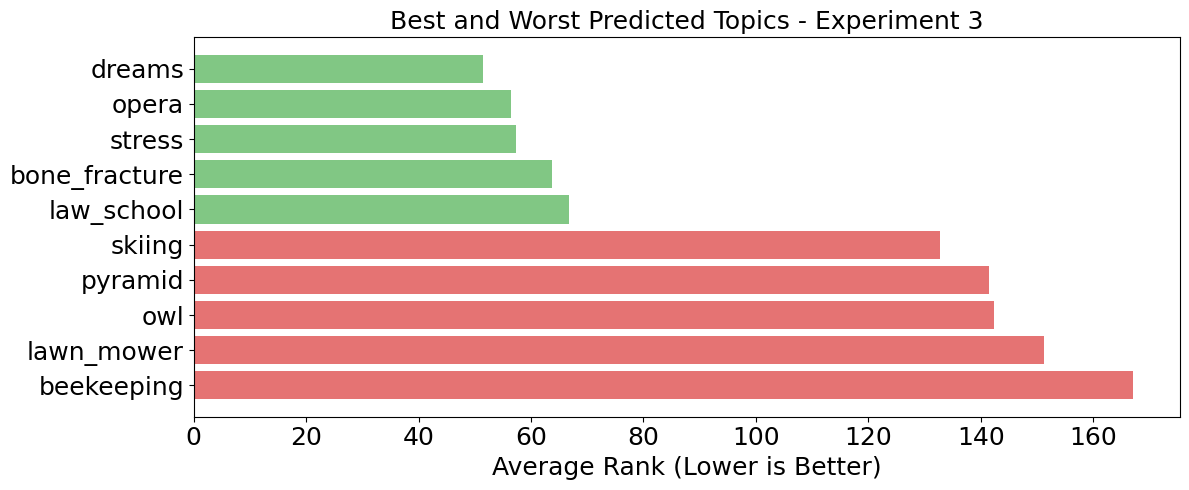

In [ ]:
labels_passage2 = np.array([x.item()-1 for x in exp2["labelsPassageForEachSentence"]])
labels_topic2 = np.array([x.item()-1 for x in exp2["labelsPassageCategory"]])
topic_names2 = [x.item() for x in exp2["keyPassageCategory"].flatten()]


sorted_topics2 = evaluate_by_topic(
    X_exp2, Y_exp2, decoder_glove_2,
    labels_passage2,
    labels_topic2,
    topic_names2,
    title="Experiment 2"
)

labels_passage3 = np.array([x.item()-1 for x in exp3["labelsPassageForEachSentence"]])
labels_topic3 = np.array([x.item()-1 for x in exp3["labelsPassageCategory"]])
topic_names3 = [x.item() for x in exp3["keyPassageCategory"].flatten()]


sorted_topics3 = evaluate_by_topic(
    X_exp3, Y_exp3, decoder_glove_2,
    labels_passage3,
    labels_topic3,
    topic_names3,
    title="Experiment 3"
)

## Our analysis

### Experiment 2 Analysis (384 sentences, rank accuracy = 0.588)
In Experiment 2, the decoder was more successful at predicting topics related to concrete and visually grounded domains, such as body_part, human, and dwelling. These categories likely evoke consistent mental imagery and sensorimotor representations across subjects, which may lead to more stable neural patterns.

On the other hand, the decoder performed poorly on abstract or semantically broad topics like profession, vegetable, and vehicles_transport. These topics include heterogeneous concepts and may not consistently activate the same brain regions, leading to noisier representations. Notably, profession had the highest average rank (248.62), suggesting considerable decoding difficulty in that semantic space.

### Experiment 3 Analysis (243 sentences, rank accuracy = 0.587)
In Experiment 3, the best-decoded topics again tended to involve internally vivid or emotionally evocative content, such as dreams, stress, and opera. These categories may tap into more coherent or affectively salient neural representations, improving decoder performance even when the sentences are more narrative and stylistically diverse.

The worst-decoded topics — including beekeeping, lawn_mower, and owl — are specific, potentially rare topics with limited exposure or weaker representation in the training data. These results suggest that while the decoder generalizes well to semantically rich or emotionally salient topics, it struggles with niche or narrowly-defined domains.

## Overall
Despite the stylistic and topical differences between EXP2 and EXP3 datasets, the decoder achieved nearly identical overall accuracy (~0.588), reinforcing the idea that it captures generalizable semantic structure. However, performance still varies significantly by topic, underscoring the importance of semantic granularity and neural consistency in decoding success.



# Task 2

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()  # set to eval mode

def get_bert_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        # Mean pooling of last hidden state
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Create sentence embeddings unsing BERT
bert_vectors = np.stack([get_bert_embedding(s) for s in sentences_2])  # shape: (384, 768)


In [ ]:
all_ranks_glove, average_ranks_glove, decoder_glove = train(X_exp2, Y_exp2, np.array(sentences_2), k, fold_size)

100%|██████████| 18/18 [01:37<00:00,  5.44s/it]


Average rank across folds: 124.54


In [ ]:
all_ranks_bert, average_ranks_bert, decoder_bert = train(X_exp2, bert_vectors, np.array(sentences_2), k, fold_size)


100%|██████████| 18/18 [02:31<00:00,  8.40s/it]


Average rank across folds: 96.94


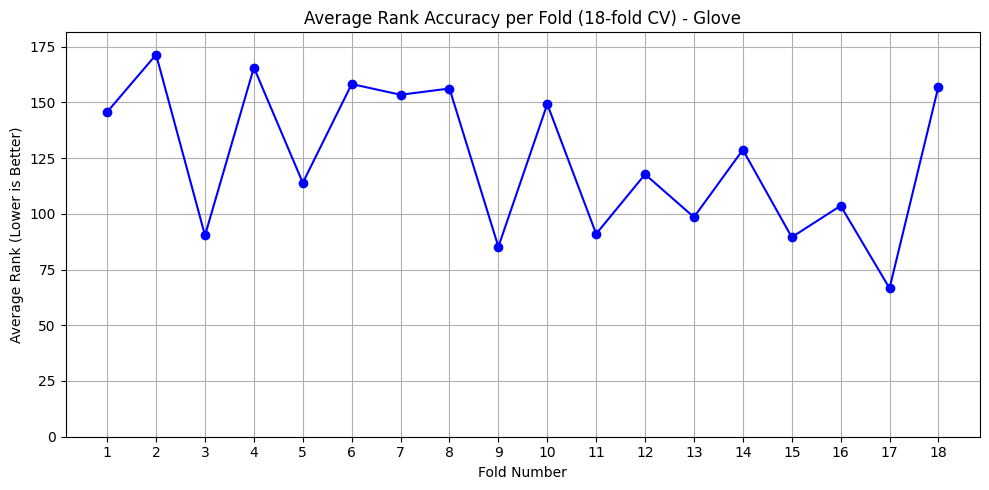

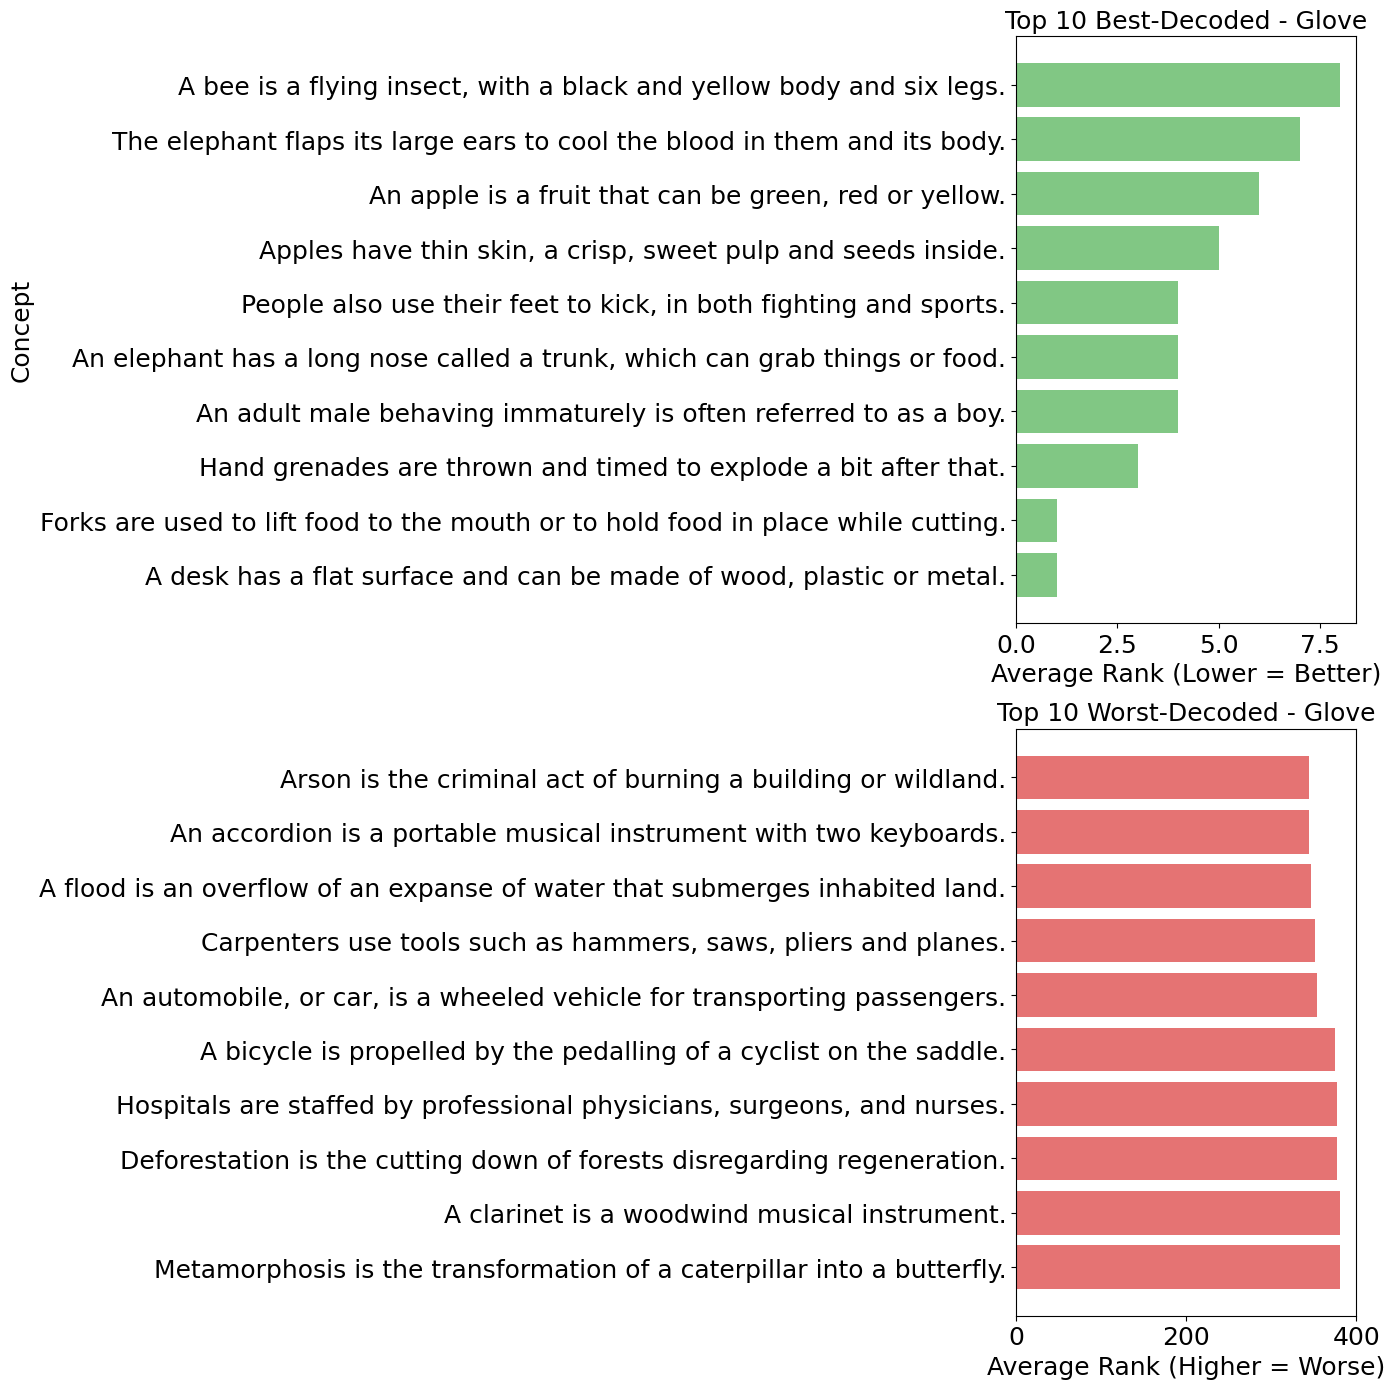

Number of concepts with average rank < 192 using Glove: 136


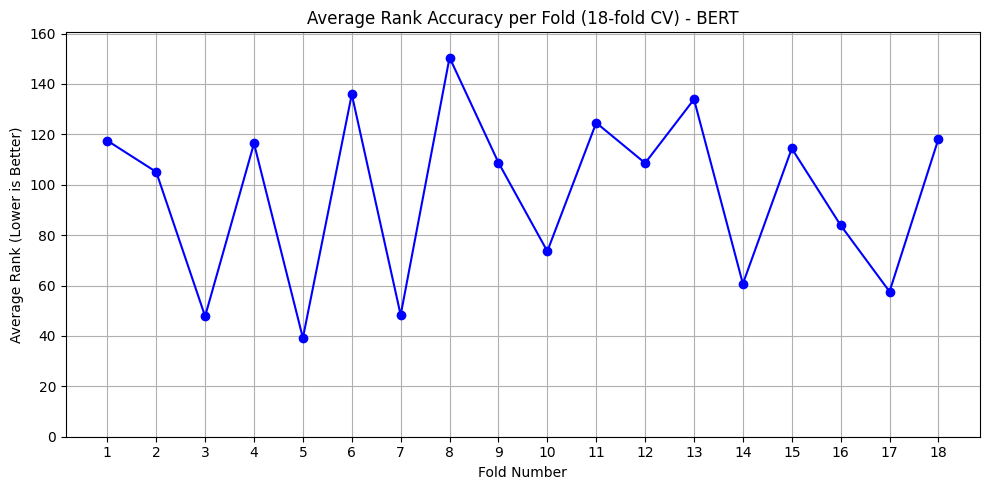

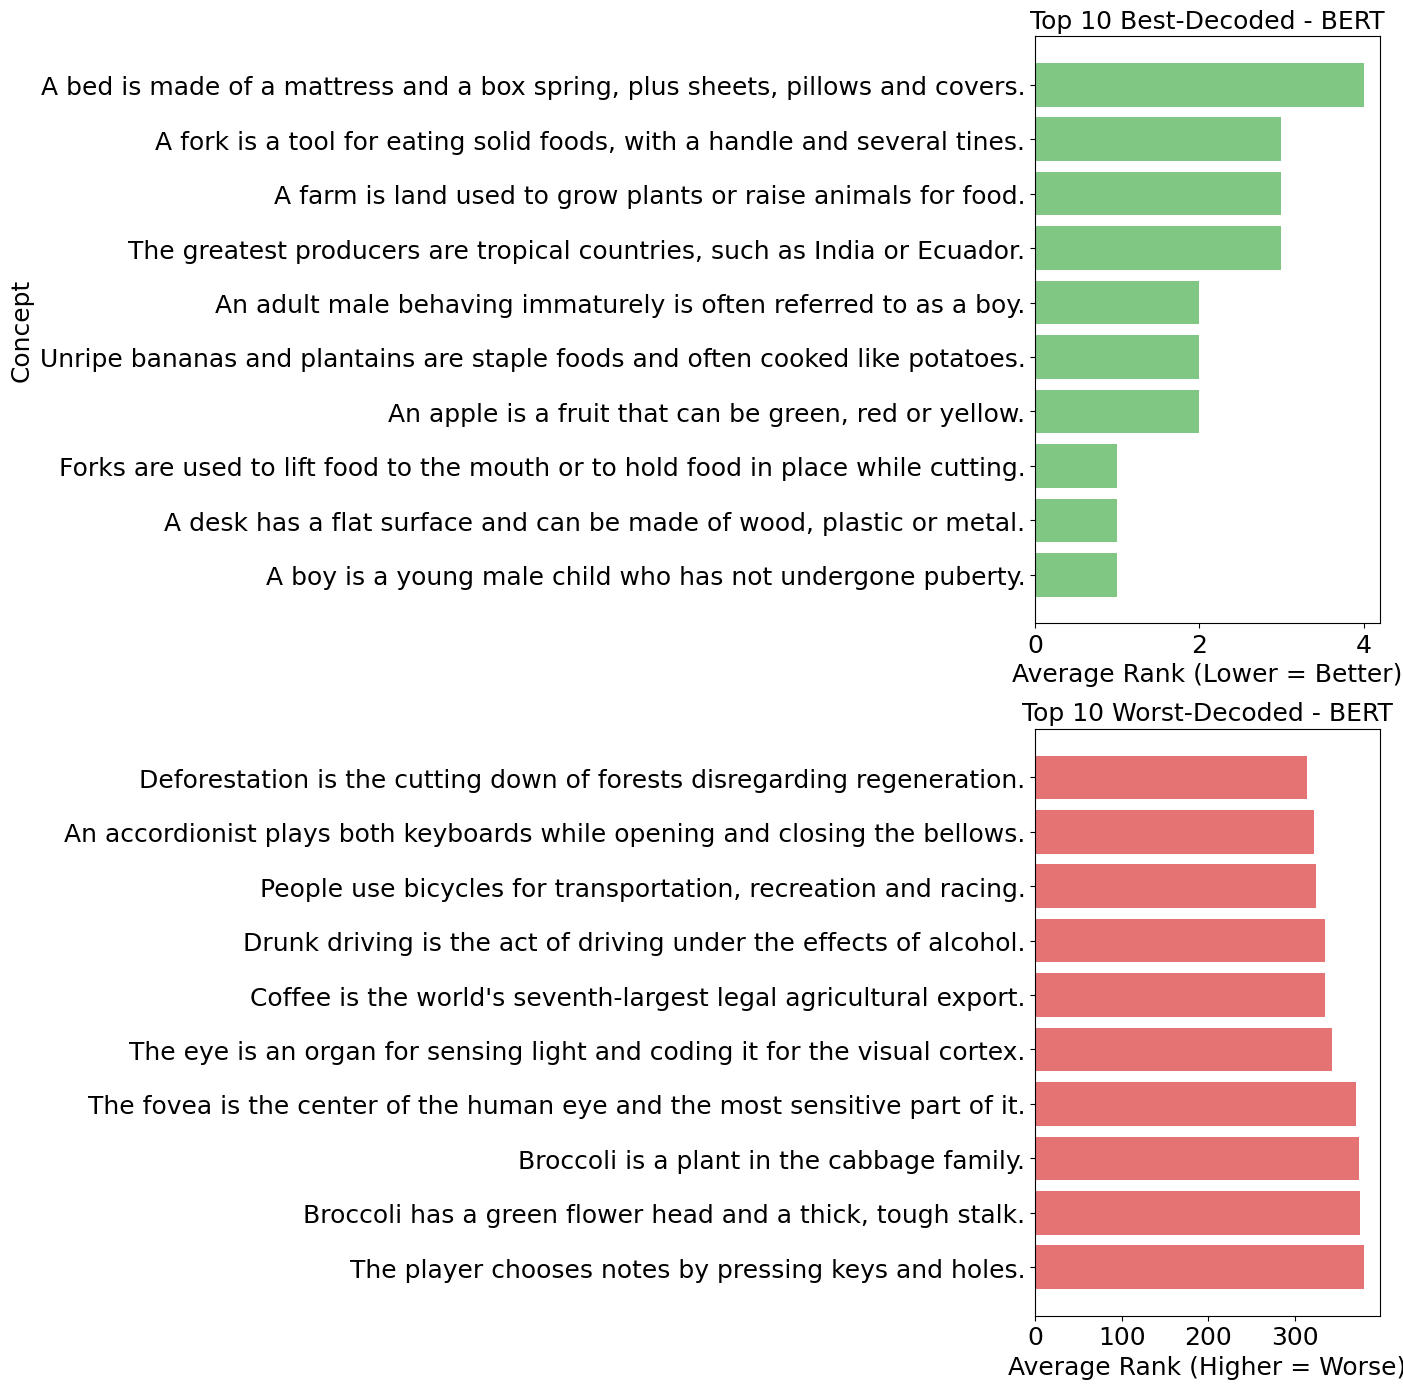

Number of concepts with average rank < 192 using BERT: 146


In [ ]:
evaluate(average_ranks_glove, all_ranks_glove, 'Glove', k, len(sentences_2))
evaluate(average_ranks_bert, all_ranks_bert, 'BERT', k, len(sentences_2))

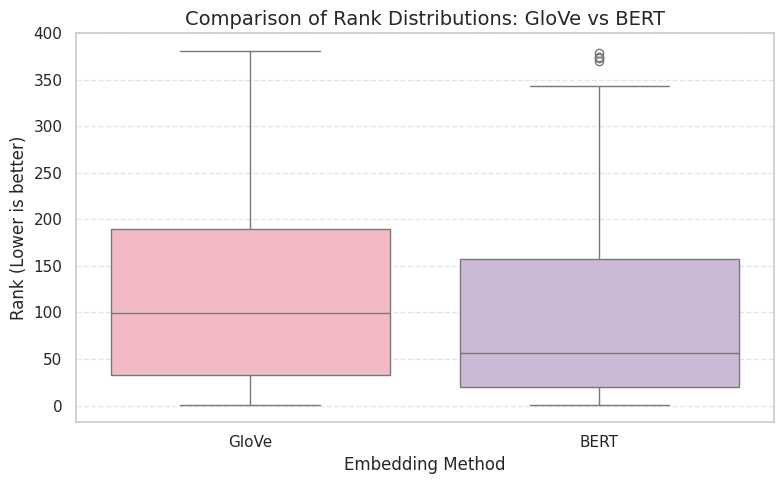

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract ranks
ranks_glove = [x[1] for x in all_ranks_glove]
ranks_bert = [x[1] for x in all_ranks_bert]

# Prepare DataFrame
df = pd.DataFrame({
    'Rank': ranks_glove + ranks_bert,
    'Method': ['GloVe'] * len(ranks_glove) + ['BERT'] * len(ranks_bert)
})

# Set style and custom pastel colors
sns.set(style='whitegrid')
pastel_palette = ["#fbb1bd", "#cdb4db"]  # pastel pink and purple

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Method', y='Rank', data=df, hue='Method', palette=pastel_palette)
plt.title('Comparison of Rank Distributions: GloVe vs BERT', fontsize=14)
plt.ylabel('Rank (Lower is better)', fontsize=12)
plt.xlabel('Embedding Method', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
for k in [1, 5, 10, 50, 100, 192]:
    prop_glove = np.mean([r <= k for r in ranks_glove])
    prop_bert = np.mean([r <= k for r in ranks_bert])
    print(f"Top-{k} accuracy: GloVe = {prop_glove:.2f}, BERT = {prop_bert:.2f}")

Top-1 accuracy: GloVe = 0.01, BERT = 0.02
Top-5 accuracy: GloVe = 0.04, BERT = 0.09
Top-10 accuracy: GloVe = 0.07, BERT = 0.13
Top-50 accuracy: GloVe = 0.33, BERT = 0.46
Top-100 accuracy: GloVe = 0.50, BERT = 0.66
Top-192 accuracy: GloVe = 0.76, BERT = 0.81


## Our analysis

The BERT-based decoder outperformed GloVe across multiple metrics. It achieved slightly higher rank accuracy, lower median rank, and decoded more sentences with high accuracy. These gains reflect the strength of contextualized representations: unlike GloVe, BERT encodes word order, sentence structure, and contextual meaning, making it more expressive and better aligned with how the brain may represent sentence-level semantics.

Visualizations also support this trend. While both models performed well on simple, concrete sentences, the GloVe decoder struggled more with complex or compositional inputs. In contrast, BERT better captured structured descriptions (e.g. a bed is made of a mattress and a box spring...), suggesting that contextual embeddings better match the richness of neural signals associated with linguistic meaning.

That being said, we personally expected the BERT-based decoder to perform significantly better.